<center><br><font size=10>Machine Learning Final Project</font><br>
<font size=6>Python for ML</font>
<br><br>
<b>Authors</b>: Noy Bar-Moshe & Dor Avrahami
<br><i>Spring 2023</i></center>




<br>




# Project Plan:
### <p style='color:lightblue'>1. Exploration</p>
Assessment of the data
***
### <p style='color:lightblue'>2. Preprocessing</p>
Data split, Missing Values, Feature Selection, Outliers, Standardization, Test Processing
***
### <p style='color:lightblue'>3+4. Modelling</p>
Running models and evaluating results
***
### <p style='color:lightblue'>5. Prediction</p>
***

 


 Let's get started! 

**Import Libraries** <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import time

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
original_df = pd.read_csv('train.csv')
df = original_df.copy()
train_data = df.iloc[:,:-1]
train_labels = df.iloc[:,-1]

***
<font size=8> <center> Exploration </font>
***

We begin the exploration part by loading the data and taking a first look.

In [4]:
df.shape

(60000, 24)

In [5]:
df.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1


We can see there are 23 features and 60,000 samples in the train data.<br>
We'll continue to explore by looking at more information about our data.

In [6]:
df.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,...,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
count,6.000000e+04,5.806500e+04,58261.000000,57907.000000,57073.000000,56676.000000,58039.000000,58063.000000,57102.000000,57344.000000,...,56340.000000,57651.000000,57475.000000,56911.000000,5.726100e+04,57243.000000,60000.000000,56296.000000,56249.000000,60000.000000
mean,1.501019e+06,1.965704e+06,106.195671,30.803271,0.403764,0.543069,0.860456,0.254189,0.234195,40.172468,...,1.644799,12.501292,0.429282,16.263429,1.207710e+05,32.658511,53.678748,4.015404,5.810361,0.500000
std,4.727391e+06,2.017881e+07,213.452315,508.079533,0.490655,0.498146,0.346516,0.435408,0.423498,1239.701661,...,37.003752,71.631716,11.496862,82.193088,6.052203e+05,1094.710748,20.632479,6.368440,0.641208,0.500004
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,5.000000e+00,5.000000,17.500000,-17.783199,0.004929,0.000000
25%,1.070080e+05,1.228800e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.013000e+03,7.447368,38.400000,-0.293525,5.469978,0.000000
50%,4.833280e+05,4.218880e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,2.283500e+04,12.009456,43.300000,3.658333,5.856659,0.500000
75%,1.239326e+06,1.601536e+06,152.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,10.000000,0.000000,11.000000,7.615600e+04,17.310647,69.100000,7.863973,6.344090,1.000000
max,3.253537e+08,4.278288e+09,15047.000000,48840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,181660.000000,...,5324.000000,9387.000000,2492.000000,7010.000000,5.034687e+07,207990.925620,100.000000,43.926598,6.584937,1.000000


### Preliminary glimpse
  * Exactly 50% of execution files are malicious
  * Std (hence variance) of printables, size and vsize is extremely high 
  * There is a big veriety among features regarding their scales
  * Means are different from 0 and stds are different from 1 hence the data is not standarized
  * Some features scales do not lie in the range between 0-1 hence the data is not normalized


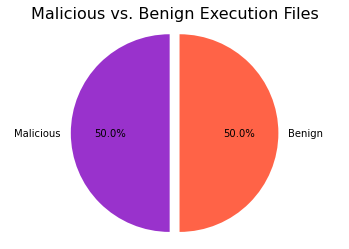

In [7]:
labels = ['Malicious','Benign']
sizes = [50, 50]
colors = ['darkorchid', 'tomato']

fig, ax = plt.subplots(facecolor='white')
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode =(0.1,0))
ax.axis('equal')
plt.title('Malicious vs. Benign Execution Files', fontsize = 16)

plt.show()

Half of the samples in the train data are malicious and half are benign. Therfore we can not assume there is a certain pattern of behavior in the samples,that can indicate a prone to a certain label.<br> It requiers a broader exploration and an excellent model which we will now start training on the way to ideal classification.

Lets see which types of features we have in our data

In [8]:
df.dtypes

sha256                  object
size                     int64
vsize                  float64
imports                float64
exports                float64
has_debug              float64
has_relocations        float64
has_resources          float64
has_signature          float64
has_tls                float64
symbols                float64
numstrings             float64
paths                  float64
urls                   float64
registry               float64
MZ                     float64
printables             float64
avlength               float64
file_type_trid          object
file_type_prob_trid    float64
A                      float64
B                      float64
C                       object
label                    int64
dtype: object

We can see that there are some categorical features and a majority of numeric features.

Let's take a look on the features behaviors by looking at their density plots

In [9]:
#the function returns only the numeric columns in df
def numeric_df(data):
   data_copy = data.copy()
   numeric_columns = data_copy.select_dtypes(include=['float64', 'int64'])
   return numeric_columns

numeric_columns = numeric_df(df).columns

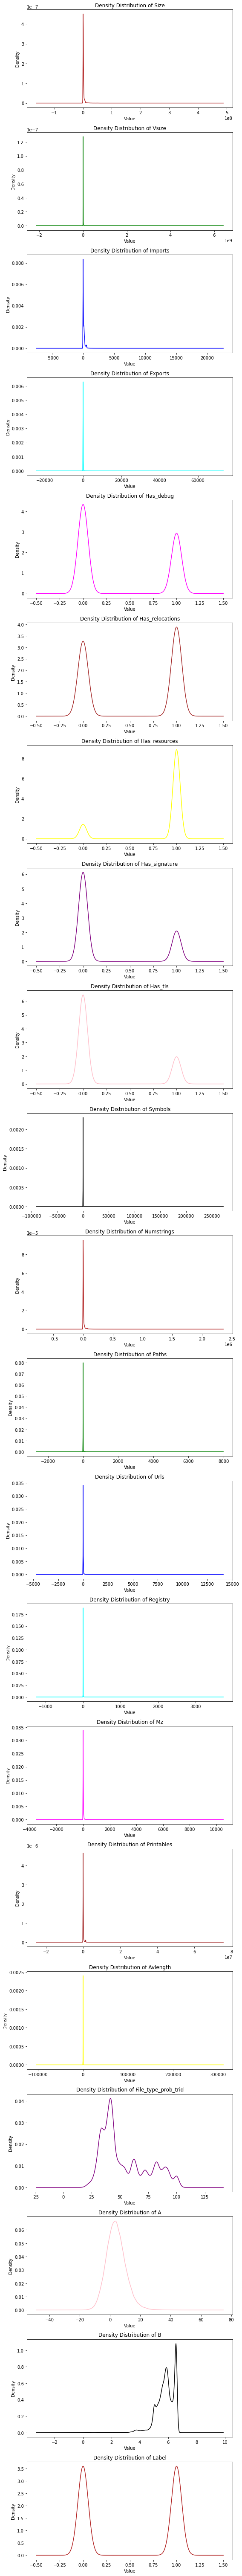

In [10]:
colors = ['firebrick', 'green', 'blue', 'cyan', 'magenta','brown', 'yellow', 'purple', 'pink', 'black']

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 4 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
   
    df[column].plot.density(ax=axes[i], color=colors[i % len(colors)]) 
    axes[i].set_title('Density Distribution of ' + column.capitalize())
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sha256               60000 non-null  object 
 1   size                 60000 non-null  int64  
 2   vsize                58065 non-null  float64
 3   imports              58261 non-null  float64
 4   exports              57907 non-null  float64
 5   has_debug            57073 non-null  float64
 6   has_relocations      56676 non-null  float64
 7   has_resources        58039 non-null  float64
 8   has_signature        58063 non-null  float64
 9   has_tls              57102 non-null  float64
 10  symbols              57344 non-null  float64
 11  numstrings           57282 non-null  float64
 12  paths                56340 non-null  float64
 13  urls                 57651 non-null  float64
 14  registry             57475 non-null  float64
 15  MZ                   56911 non-null 

### Outliers
Althought majority of the features does not distribute normally, when using boxplot we can conclude the distribution, median, range, and presence of outliers for each feature.
 
 


(0.0, 100000.0)

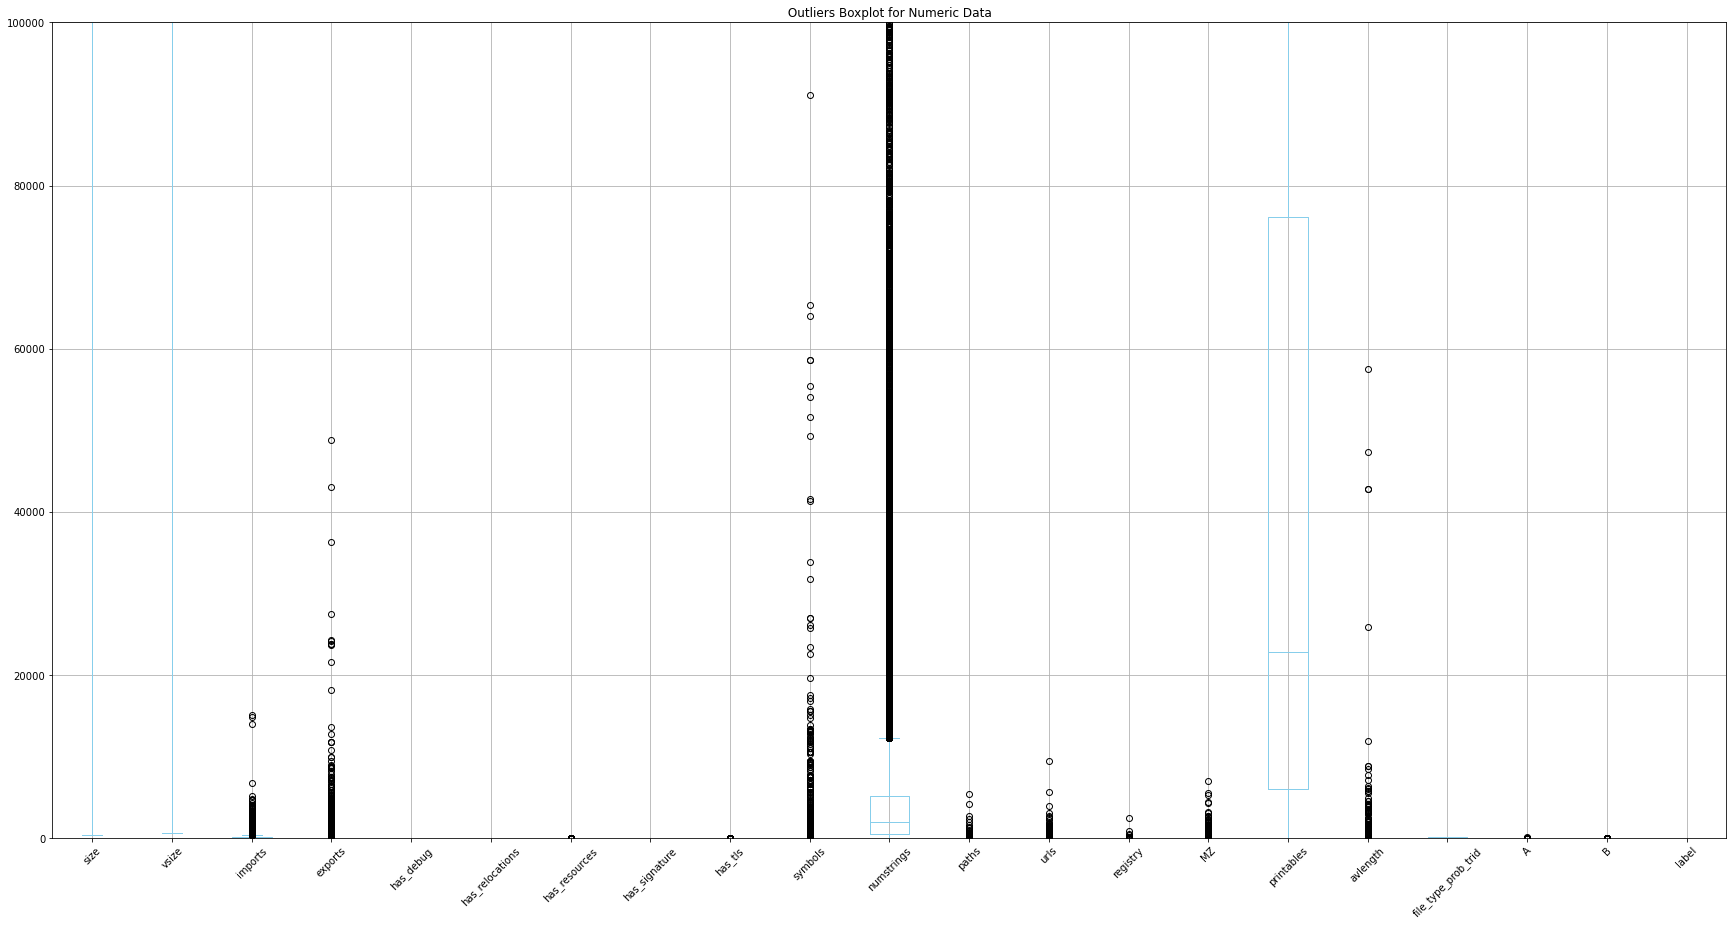

In [12]:
df_num = numeric_df(df)

boxplot = df_num.boxplot(rot=45, figsize = (30,15), color  = 'skyblue').set_title(' Outliers Boxplot for Numeric Data ')
plt.ylim(0, 100000) 

`A` is the only feature that distributes normally, so he his the only one we can rely on his boxplot for ouliers detection.

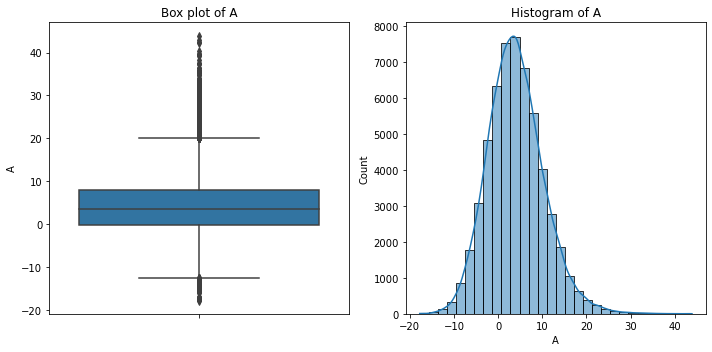

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(y = df['A'], ax=axes[0])
axes[0].set_title('Box plot of A')

# Histogram
sns.histplot(df['A'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of A')

plt.tight_layout()
plt.show()


As we can see, there are values outside the "whiskers" of the box meaning there are outliers in `A`.

## Null values

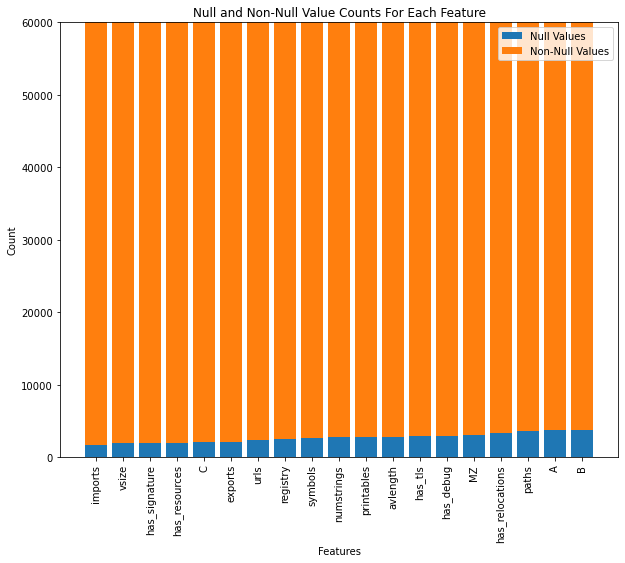

In [14]:
null_count = df.isnull().sum()
null_count = null_count[null_count > 0]
null_count.sort_values(inplace=True)

non_null_count = df.notnull().sum()
non_null_count = non_null_count[null_count.index]

plt.figure(figsize=(10,8))
plt.bar(null_count.index, null_count.values, label='Null Values')
plt.bar(non_null_count.index, non_null_count.values, bottom=null_count.values, label='Non-Null Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Null and Non-Null Value Counts For Each Feature')
plt.ylim(0, 60000)
plt.legend()
plt.xticks(rotation='vertical')
plt.show()


As we can see, number of nulls is low, so there are not many missing values in our data.<br> Still,every number of missing value requiers handeling. we will handle them in the preprocessing part.

In [15]:
def num_of_nulls(df):
    num_null_values = df.isnull().sum().sum()
    total_values = df.size
    percent_null_values = (num_null_values / total_values) * 100
    df_name = [name for name, frame in globals().items() if frame is df][0]

    print("Percentage of null values in", df_name, "is {:.2f}%".format(percent_null_values))

num_of_nulls(df)

Percentage of null values in df is 3.53%


In [16]:
def check_nan_in_column(df, column_name):
    if df[column_name].isnull().sum() > 0:
        print(f"The column '{column_name}' has {df[column_name].isnull().sum()} NaN values.")
    else:
        print(f"The column '{column_name}' does not have any NaN values.")

check_nan_in_column(df, 'sha256')

The column 'sha256' does not have any NaN values.


 ## Categorical features
we want to see the diversification of the categories in each categorical feature, to improve our chances to avoid a problematic situation of a too large number of dimensions.

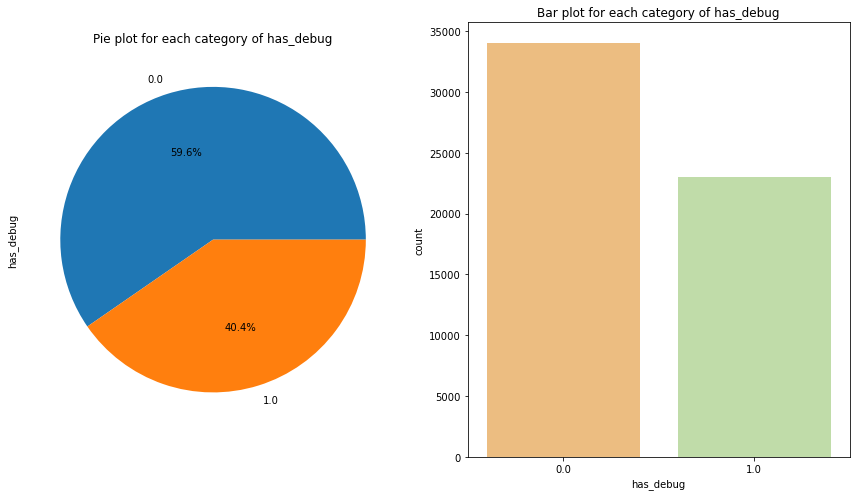

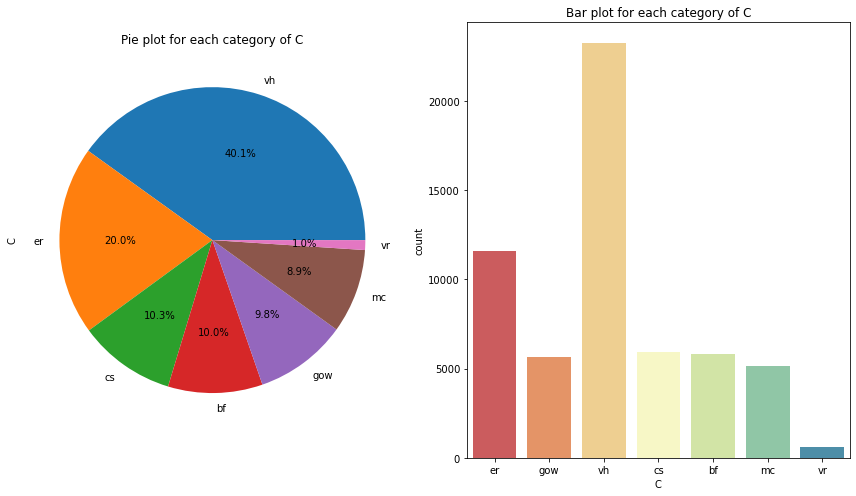

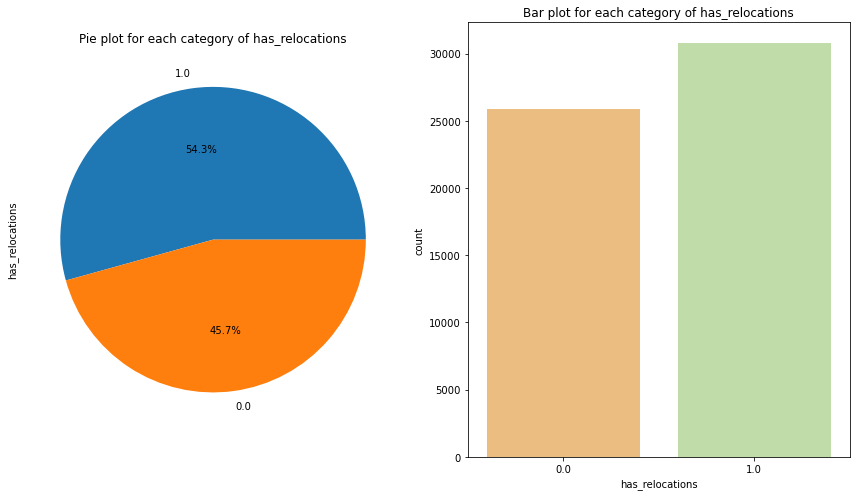

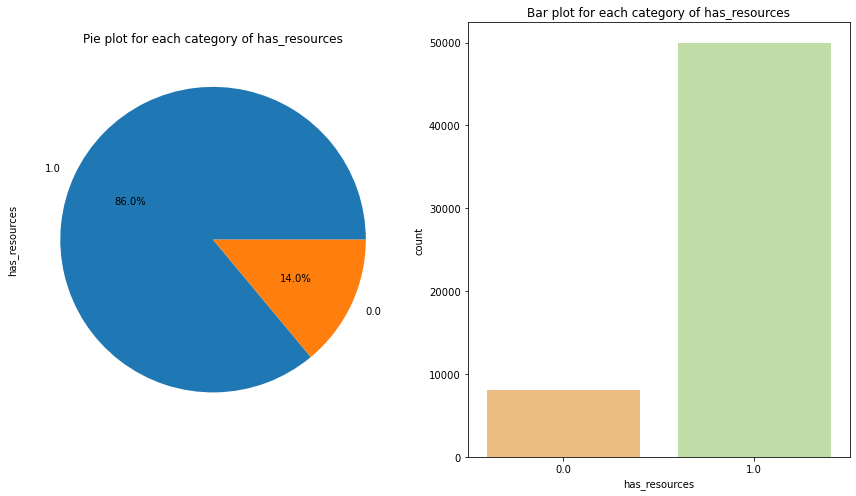

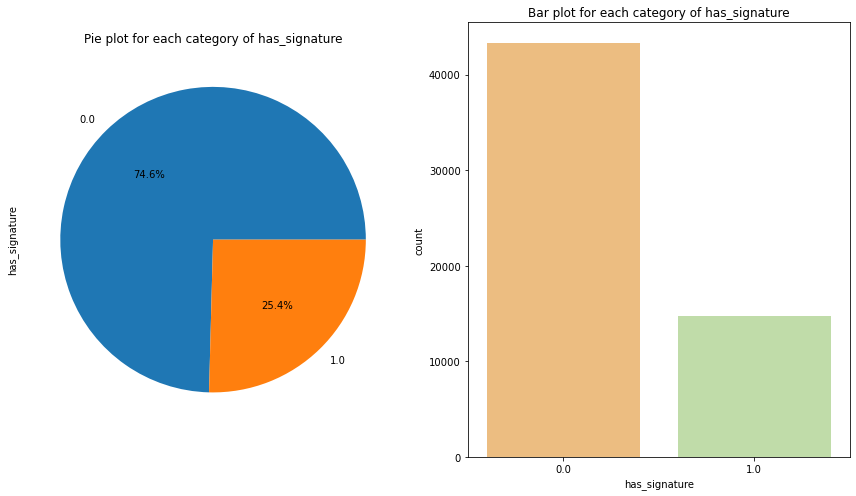

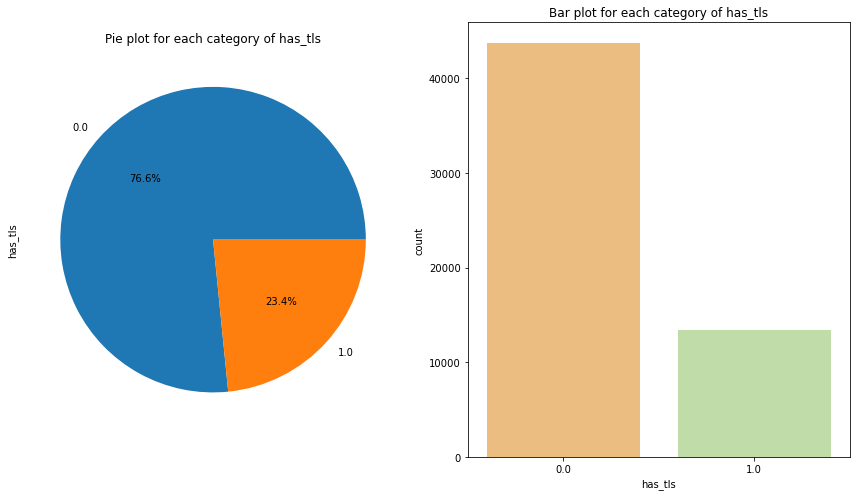

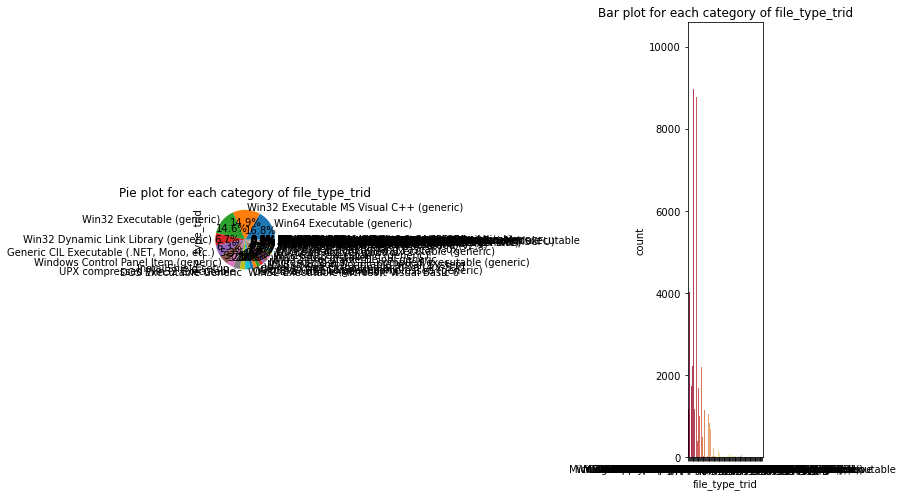

In [17]:
categorical_feat = ['has_debug','C', 'has_relocations', 'has_resources', 'has_signature','has_tls', 'file_type_trid']

def cat_plot(feat, df):    
    plt.figure(figsize=(12, 7))
    
    # Pie plot
    plt.subplot(1, 2, 1)
    df[feat].value_counts().plot(kind='pie', label=feat, autopct='%1.1f%%')
    plt.title('Pie plot for each category of ' + feat)
    
    # Bar plot
    plt.subplot(1, 2, 2)
    sns.countplot(x=feat, palette="Spectral", data=df)
    plt.title('Bar plot for each category of ' + feat)
    
    plt.tight_layout()
    plt.show()

for feat in categorical_feat:
    cat_plot(feat, df)

* `has_debug`, `has_signature`, `has_tls` are features with a majority of "0" labels.
* `has_relocations`, `has_resources` are features with a majority of "1" labels.
* `'C'` has one category which is significantly dominant comparing to the others.
* `'file_type_trid'` there are too many categories. We will handle it later.

We want to count how many categories there are in every categorical feature.<br>
We will inculde `sha256` in spite of it is containing an enormous number of different categories,<br> in order to find if the number will stand on 60,000, or a smaller number which indicates that tere are duplicates in the train data.<br>
On the other hand, we won't include the binary features, altought they are categorical.

In [18]:
def count_categories(df, categorical_features):
    for category in categorical_features:
        feat_cat_num = df[category].value_counts() # to find the groups of categories in each feature
        print(category ,':' ,len(feat_cat_num)) # to find number of different groups in each feature

categorical_features = ['sha256','file_type_trid' , 'C']
count_categories(df, categorical_features)


sha256 : 60000
file_type_trid : 89
C : 7


We can see there are 60,000 different categories in `sha256`. Meaning we have no duplicates to take care of in our data, which is great!


Something less great we found out is that in `file_type_trid` feature there are 89 categories.<br>This can lead to several problems such as: 
* Increased Dimensionality which will lead to increased memory usage, and computational challenges.
* Sparse Data -affecting model performance and complexity. 
* Model Complexity- potential overfitting, and decreased generalization performance. 
* Reduced Interpretability-Difficulty in interpreting the impact of individual categories and understanding relationships.	  

So we want to shrink this number. We will do that in the preproccesing part.


## Correlations


Let's see how the features affect each other

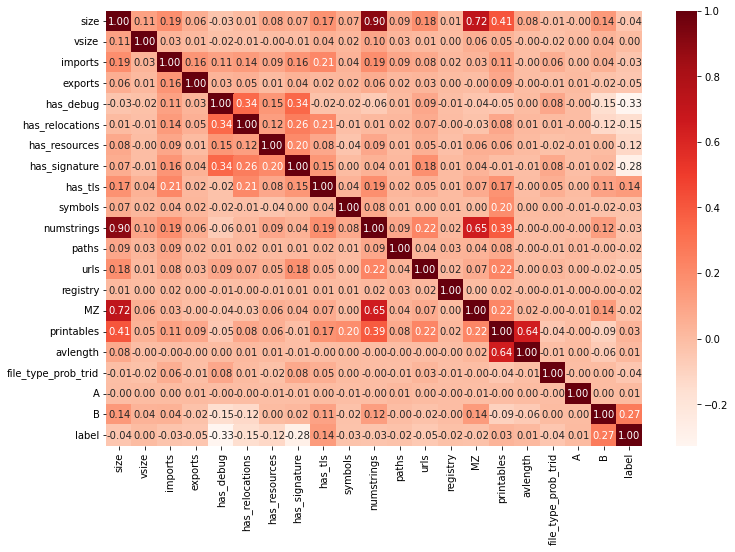

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Reds', cbar=True)
plt.show()



In [20]:
def features_corr (corr_matrix):

    # Create a DataFrame from the lower triangle of the correlation matrix
    lower_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
    # Stack the DataFrame and sort by absolute correlation
    des_sorted_pairs = lower_tri.stack().sort_values(ascending=False)
    print(des_sorted_pairs.head(5), '\n')
    ase_sorted_pairs = lower_tri.stack().sort_values(ascending=True)
    print(ase_sorted_pairs.head(5))

features_corr(corr_matrix)

numstrings  size          0.898811
MZ          size          0.715902
            numstrings    0.648995
avlength    printables    0.643820
printables  size          0.412911
dtype: float64 

label  has_debug         -0.326436
       has_signature     -0.282491
B      has_debug         -0.153974
label  has_relocations   -0.151787
B      has_relocations   -0.124774
dtype: float64


We can see that there are several features with strong positive correlations between them. 

Now we want to explore correlations between the features and the label exclusively.



In [21]:
feature_label_correlation = train_data.corrwith(df['label'])
print(feature_label_correlation.sort_values(ascending=False))

B                      0.266021
has_tls                0.137018
printables             0.031889
avlength               0.014361
A                      0.006987
vsize                  0.004868
registry              -0.016385
paths                 -0.021768
MZ                    -0.024243
symbols               -0.027333
imports               -0.031191
numstrings            -0.031983
size                  -0.043614
file_type_prob_trid   -0.044327
exports               -0.045285
urls                  -0.052189
has_resources         -0.119871
has_relocations       -0.151787
has_signature         -0.282491
has_debug             -0.326436
dtype: float64


We did not find a star feature that has high correlation with the label and can help us predict the classification.

But we are not giving up and continue in our journey to find the best model!

***
<font size=8> <center> Preproccesing </font>
***

In [22]:
conv_df = df.copy() # new df for convertions

## Data split

From now on, the data will be seperated to train and validation sets in order to achieve the best methods to perform on the actuall test.
<br>We do not want to learn anything from test samples, only from the train. Our functions will be adjusted to that purpuse.<br>The goal is to prevent data leakage as much as possible.

In [23]:
conv_train_data = conv_df.iloc[:,1:-1]
conv_train_labels = conv_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(conv_train_data, conv_train_labels, test_size=0.25, random_state=42,shuffle=True)

In [24]:
print(f'conv_train_data.shape: {conv_train_data.shape},\nconv_train_labels.shape: {conv_train_labels.shape}\n')
print(f'X_train.shape: {X_train.shape}, \ny_train.shape: {y_train.shape}, \
\nX_test.shape: {X_test.shape}, \ny_test.shape: {y_test.shape}')

conv_train_data.shape: (60000, 22),
conv_train_labels.shape: (60000,)

X_train.shape: (45000, 22), 
y_train.shape: (45000,), 
X_test.shape: (15000, 22), 
y_test.shape: (15000,)


To be safe, we want to to insure that there are no duplicates in train and and validation.

In [25]:
# Convert DataFrames to sets of tuples
train_set = set([tuple(line) for line in X_train.values])
test_set = set([tuple(line) for line in X_test.values])

# Find the intersection between the sets
overlap = train_set & test_set

print('Number of common rows:', len(overlap))

Number of common rows: 0


Now to the preproccesing part.

## Missing values 


In [26]:
# This function takes a dataframe (data) as input and computes the 
# count and ratio of missing values for each column
def compute_nulls(data):

    # Create a new DataFrame 'missing_values' with the count of missing values in each column of 'data'
    missing_values = pd.DataFrame(data.isna().sum(), columns=['missing_count'])
    # Calculate the ratio of missing values for each column and add it to the DataFrame as a new column 'missing_ratio'
    missing_values['missing_ratio'] = (missing_values['missing_count'] / data.shape[0]).round(3)
    # Sort the DataFrame by descending order of missing ratio
    missing_values = missing_values.sort_values(by='missing_ratio', ascending=False)
    return missing_values

nulls_df = compute_nulls(X_train)
nulls_df

,missing_count,missing_ratio
B,2893,0.064
A,2773,0.062
paths,2764,0.061
has_relocations,2506,0.056
MZ,2309,0.051
has_debug,2212,0.049
has_tls,2217,0.049
avlength,2044,0.045
printables,2012,0.045
numstrings,2039,0.045


The maximum perecentage of null values in 6.4%, this is not much, so we will not drop any features according to their null percentage.
<br>We will not do so because we can still extract potential benefitial information and knowledge from those features, with the right treatment.

In [27]:
num_of_nulls(X_train)

Percentage of null values in X_train is 3.86%


In [28]:
# This function takes a dataframe (df) and the number of starting nulls (start_nulls) and ending nulls (end_nulls)
# to consider, and calculates the percentage of rows with i or more null values for i in the range start_nulls to end_nulls
# It also prints out the number of rows with at least end_nulls number of nulls

def calculate_null_occurrences(df, start_nulls, end_nulls):
    for i in range(start_nulls, end_nulls + 1):
        # Calculate the percentage of rows with i or more null values
        rows_with_i_or_more_nulls = round((df.isna().sum(axis=1) >= i).mean() * 100, 2)
        print("% of rows with", i, "or more null values:", rows_with_i_or_more_nulls)

    num_rows_with_end_nulls_or_more = (df.isna().sum(axis=1) >= end_nulls).sum()
    print("Number of rows with", end_nulls, "or more null values:", num_rows_with_end_nulls_or_more)

calculate_null_occurrences(X_train, start_nulls=2, end_nulls=5)


% of rows with 2 or more null values: 20.71
% of rows with 3 or more null values: 4.91
% of rows with 4 or more null values: 0.83
% of rows with 5 or more null values: 0.14
Number of rows with 5 or more null values: 61


From looking at the rows of samples with a certian amount of nulls, we can see that 61 of the rows in X_train contain 5 or more null values.
<br>We can not rely on samples there are missing this amount of information, so we decided to drop those samples from the train data, in order to achieve strong and relieble performence when training.

In [29]:
# This function is dropping the samples that contain 5 or more Nulls values 
def high_nulls_samples_drop(df):

    df.drop(df[df.isnull().sum(axis=1) >= 5].index, inplace = True)
    return df


train_combined = pd.concat([X_train,y_train], axis=1)
train_combined = high_nulls_samples_drop (train_combined)
y_train = train_combined['label']
X_train = train_combined.drop(columns=['label'])


num_of_nulls(X_train)


Percentage of null values in X_train is 3.83%


## Handeling outliers

array([[<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'vsize'}>,
        <AxesSubplot:title={'center':'imports'}>,
        <AxesSubplot:title={'center':'exports'}>],
       [<AxesSubplot:title={'center':'has_debug'}>,
        <AxesSubplot:title={'center':'has_relocations'}>,
        <AxesSubplot:title={'center':'has_resources'}>,
        <AxesSubplot:title={'center':'has_signature'}>],
       [<AxesSubplot:title={'center':'has_tls'}>,
        <AxesSubplot:title={'center':'symbols'}>,
        <AxesSubplot:title={'center':'numstrings'}>,
        <AxesSubplot:title={'center':'paths'}>],
       [<AxesSubplot:title={'center':'urls'}>,
        <AxesSubplot:title={'center':'registry'}>,
        <AxesSubplot:title={'center':'MZ'}>,
        <AxesSubplot:title={'center':'printables'}>],
       [<AxesSubplot:title={'center':'avlength'}>,
        <AxesSubplot:title={'center':'file_type_prob_trid'}>,
        <AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:titl

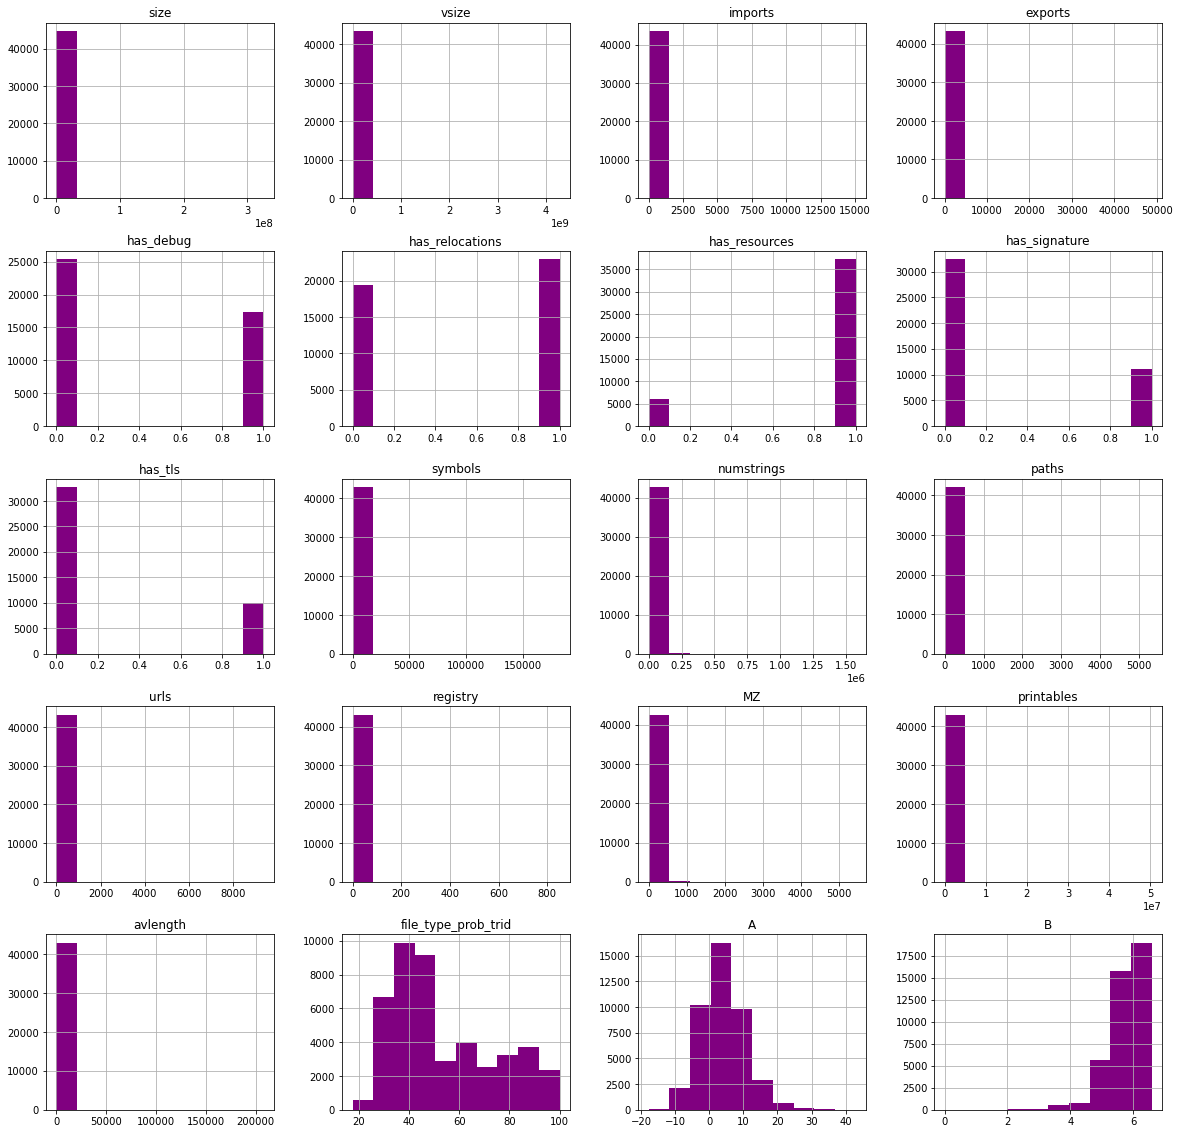

In [30]:
numeric_columns = numeric_df(X_train).columns
X_train.hist(column=numeric_columns,figsize=(20,20),color = 'purple')

'A' is the only normally distribued feature in the data. When the features does not normally distribute, we can not assume which of the values need to be treated like outliers. Therfore we will handle outlier values just in 'A'.
Beacause the majority of the feature do not distribute normally and there is a possability that there are untreated outliers we can not detect, we will try to choose models that can handle outliers and still perform well (Like RFC).

We decided to use the 'Winsorization' method in order to deal with the oultliers in 'A'.

In [31]:
# This function takes a dataframe 'df' as input, performs Winsorization on column 'A',
# and returns the lower_bound, upper_bound, and modified dataframe.

def fit_and_winsorize_A(df):
    # Calculate the 25th percentile (Q1) and 75th percentile (Q3) of column 'A'
    Q1 = df['A'].quantile(0.25)
    Q3 = df['A'].quantile(0.75)
    
    # Calculate the interquartile range (IQR) of column 'A'
    IQR = Q3 - Q1

    # Calculate the lower bound and upper bound for Winsorization
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify values of column 'A' that are below lower_bound or above upper_bound to be equal to lower_bound or upper_bound respectively
    df['A'] = df['A'].clip(lower=lower_bound, upper=upper_bound)

    return lower_bound, upper_bound, df


lower_bound, upper_bound, X_train = fit_and_winsorize_A(X_train)

# Modify values of column 'A' in X_test that are below lower_bound or above upper_bound to be equal to lower_bound or upper_bound respectively
X_test['A'] = X_test['A'].clip(lower=lower_bound, upper=upper_bound)



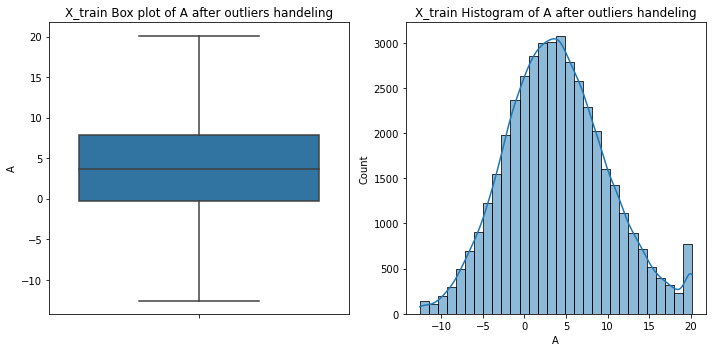

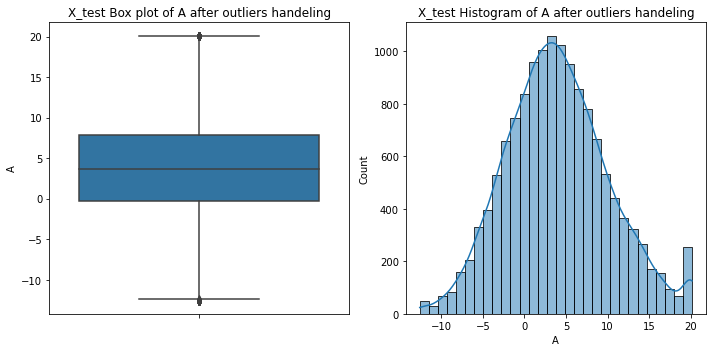

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(y = X_train['A'], ax=axes[0])
axes[0].set_title('X_train Box plot of A after outliers handeling')

# Histogram
sns.histplot(X_train['A'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('X_train Histogram of A after outliers handeling')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(y = X_test['A'], ax=axes[0])
axes[0].set_title('X_test Box plot of A after outliers handeling')

# Histogram
sns.histplot(X_test['A'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('X_test Histogram of A after outliers handeling')

plt.tight_layout()
plt.show()


## Handeling the categorical features 

### starting with file_type_trid:
first we will check how many categories has a small number of occurences. We assume that if the number of occurences is very small then the file type is insignificant. <br>We will combine all of those categories into a dummy category named 'other'.

In addition, to build a reliebale classifier, we want to make sure that the data we are training on is reliebale. 
After looking at our data and on `file_type_trid` and `file_type_prob_trid` in particiular, we noticed that there is a large number of low probabilities to confirm the file types, and that is disturbing.<br>In order to train a model that is accurate and reliable, it is essential to have certainty of the data that is being used. <br>We decided to transform all samples that have an under 50% proability to a category called "Unknown".

Number of categories in file_type_trid is: 88
Number of categories in file_type_trid is: 42


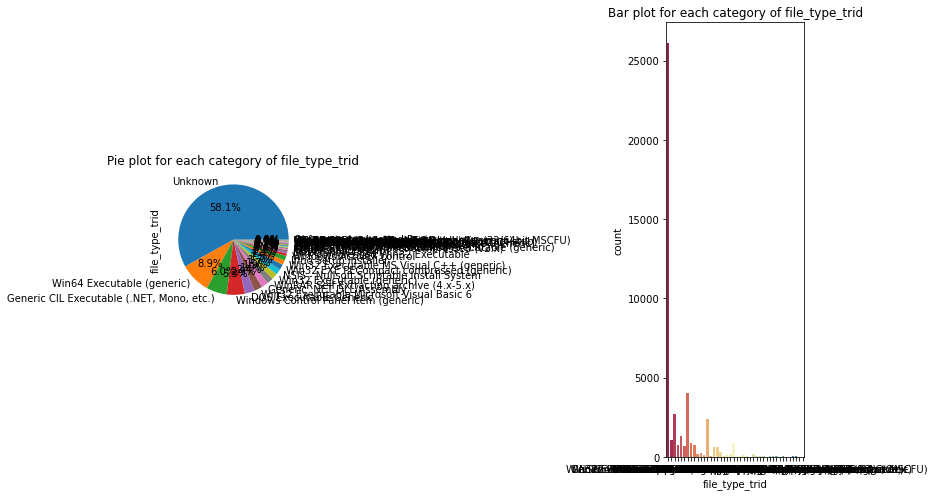

In [33]:
def count_categories(df):
    feature = 'file_type_trid'
    feat_cat_num = df[feature].value_counts()
    num_categories = len(feat_cat_num)
    print('Number of categories in file_type_trid is:', num_categories)

count_categories(X_train)



def fit_and_handle_infrequent_categories(df):

    threshold = 20
    feature = 'file_type_trid'
    category_counts = df[feature].value_counts()
    infrequent_categories = category_counts[category_counts < threshold].index
    df[feature] = df[feature].replace(infrequent_categories, 'Other')
    return infrequent_categories, df

infrequent_categories, X_train = fit_and_handle_infrequent_categories(X_train)
X_test['file_type_trid'] = X_test['file_type_trid'].replace(infrequent_categories, 'Other')



def replace_below_threshold(df):

    threshold = 50
    below_threshold_mask = df['file_type_prob_trid'] < threshold
    df.loc[below_threshold_mask, 'file_type_trid'] = 'Unknown'
    return df


X_train = replace_below_threshold (X_train)
X_test = replace_below_threshold(X_test)


count_categories(X_train)
cat_plot('file_type_trid', X_train)


We reduced the number of categories by 1/2!  

We wanted to check if dropping `file_type_trid`, `file_type_prob_trid` would bring better outcomes to the model, and later on found out that the outcome is better when keeping them with the treatment done before.<br>We figured out it does not lead to better performance, therefor it is not part of the final flow.

Now let's get to the numeric transformation.<br>
It is important to work with data that contains only numeric values in order to perform actions like standarization,pca and also to use some models.<br>


We approached mathematical manipulation which is the method we dealt with the categorical variables:
We chose to produce a coding method that works on frequency, for the two categorical variables (`C`, `file_type_trid`). <br>We created a function that codes by assigning a number to each category according to the percentage of the category appearances in the column, and normalizes it as a proportion of the total occurrences. <br><br>We chose this method because it can capture meaningful information when the frequency of occurrence of a category is important for prediction, and also helps to handle categories that occur very infrequently, as they will all be assigned a correspondingly low value.
<br>Moreover, this coding method preserves the dimensionality of the model. It retains the same categorical column as it was, in that it remains as only one column and only becomes a column with numerical content (unlike other encoders we considered such as one-hot encoder). This method will both make the columns numerical and can improve the performance of the model if we choose correct models that are optimal with this method (for example RFC).<br>
A final step before applying this method was to create one more category called "Missing" and assign all the nulls in the categorical columns to this value. We did the filling operation using Simple Imputer. Once all categories in the columns are numerically represented with no missing values, coding can be approached.


In [34]:
# Declare freq_encodings as a global variable
freq_encodings = {}

def fill_and_freq_encode_train(df):
    global freq_encodings
    cat_cols = ['C', 'file_type_trid']  
    df[cat_cols] = df[cat_cols].fillna('Missing')
    for feature in cat_cols:
        freq = df[feature].value_counts(normalize=True)
        df[feature] = df[feature].map(freq)
        freq_encodings[feature] = freq
    return df

def fill_and_freq_encode_test(df):
    global freq_encodings
    cat_cols = ['C', 'file_type_trid']  
    df[cat_cols] = df[cat_cols].fillna('Missing')
    for feature in cat_cols:
        df[feature] = df[feature].map(freq_encodings[feature]).fillna(0)
    return df

X_train = fill_and_freq_encode_train(X_train)
X_test = fill_and_freq_encode_test(X_test)

In [35]:
#to verify
non_converted_samples = X_train['file_type_trid'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
print(f"Number of non-converted samples in X_train: {non_converted_samples}")

non_converted_samples = X_test['file_type_trid'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
print(f"Number of non-converted samples in X_test: {non_converted_samples}")

non_converted_samples = X_train['C'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
print(f"Number of non-converted samples in X_train: {non_converted_samples}")

non_converted_samples = X_test['C'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()
print(f"Number of non-converted samples in X_test: {non_converted_samples}")

Number of non-converted samples in X_train: 0
Number of non-converted samples in X_test: 0
Number of non-converted samples in X_train: 0
Number of non-converted samples in X_test: 0


## Nulls fill
Now let's continue to handling the missing values in the rest of the data. <br>We were looking for a filling method that would work optimally on the type of variables that exist in our data and that would preserve the data values ​​in the optimal way. <br>We did it in the same way with Simple Imputer but this time we filled the values ​​with the average of the column in which each value is in.<br>This method was chosen for several reasons:
* filling in the average preserves the average value of each column and does not change it. This is important for preserving the overall distribution of the data, especially if values ​​are missing at random, as is the case in our data.
* The method is easy, clear and "cheap" in terms of computational performance and runtime, which is especially important when working on a project with a runtime limit.
 * The method is suitable for both continuous variables and non-continuous variables (for example 0/1), as in the situation existing in our data.

We examined additional methods for filling in the values: filling with zeros and filling in the frequency of the appearance of the missing values ​​in the column. These methods were ruled out because zero-filling increased the bias, which is something we try to avoid, and frequency-filling is mainly suitable for working with categorical variables. We tested these methods just to be sure and they did produce worst results and were rejected.

In [36]:
class MeanImputer:
    # The __init__ method initializes an empty dictionary called imputers.
    def __init__(self):
        self.imputers = {}

    def fit_transform(self, df):

        for column in df.columns:
            # Create a SimpleImputer object with missing_values set to NaN and strategy set to 'mean'.
            imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            # Fit the imputer to the column values using reshape(-1, 1) to convert the 1-dimensional array to 2-dimensional.
            # Then transform the column values using the fitted imputer and assign the transformed values back to the column in the DataFrame.
            df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1))
            # Store the fitted imputer in the self.imputers dictionary with the column name as the key.
            self.imputers[column] = imputer
        # Return the modified DataFrame 'df' after mean imputation.
        return df

    def transform(self, df):

        for column in df.columns:
            # Retrieve the fitted imputer from self.imputers using the column name as the key.
            imputer = self.imputers.get(column)
            # If an imputer is found for the column, transform the column values using the imputer and assign the transformed values back to the column in the DataFrame.
            if imputer:
                df[column] = imputer.transform(df[column].values.reshape(-1, 1))
        # Return the modified DataFrame 'df' after mean imputation.
        return df


mean_imputer = MeanImputer()

# Use the fit_transform method of the mean_imputer object to perform mean imputation on the X_train DataFrame.
# Assign the modified X_train DataFrame back to the X_train variable.
X_train = mean_imputer.fit_transform(X_train)

# Use the transform method of the mean_imputer object to perform mean imputation on the X_test DataFrame.
# Assign the modified X_test DataFrame back to the X_test variable.
X_test = mean_imputer.transform(X_test)




At this point, a question arises:<br> 
### Is the dimensionality too large?
 <br>Large dimensionality can cause the curse of dimensionality, which causes an increase in data sparsity. In addition, excessive dimensionality can cause an exponential increase in the complexity of the computational performance, a false understanding and identification of the importance of the variables and an increase in the risk of overfitting.
<br>According to the trade-off between variance and bias, the more dimensions we have, the higher variance we will have in the model, and in addition, the observations will become more difficult to collect into clusters and it will not be possible to create meaningful clusters. 
<br><br>High-dimensional data refers to a data set in which the number of variables is greater than the number of observations. 
<br>In our data we have 23 variables (including sha256) and 60,000 observations. Therefore, our data is not of a size that is defined as too large.
<br>Still, there are variables that can damage the quality of the trained model. 
<br>That's why we approached to examine the selection of variables in several ways: 
1. PCA - which operates based on the variability of the variables.
2. Manual selection - which we applied according to correlation analysis.
3. Combination of the two methods.

The manual selection was implemented using a function we created, in which we dropped variables that have a high correlation with other variables and a low correlation with the label (`MZ`, `numstrings`). <br>In addition, we also dropped variables that only have a low correlation to the label (`A`, `vsize`, `avlength`, `registry`).<br> Next, we applied PCA. We did this with and without the manually dropping, but we saw that the best results were obtained with the manually dropping only, so we only used that method. 
<br>Although the dimensionality was not large, we still reduced it.
<br><br>The effect of reducing the dimensionality: 
* lowering the chance of multicollinearity which increases the chance of overfitting on the training data. 
* The computational time is faster as there are fewer variables. 
* The fewer variables there are, the easier it is for the model to draw conclusions and interpret the data.

 <br>All these should improve the performance of the model.

 ### Manually feature selection

In [37]:
def feat_drop(df):

    #high correlation with other features and low correlation with the label
    df.drop(columns=['MZ','numstrings'], inplace=True)
    #low correlation with the label
    df.drop(columns=['A','vsize','avlength','registry'],inplace=True)
    return df


X_train = feat_drop(X_train)
X_test = feat_drop(X_test)


## Standtarization
As we noticed already in the exploration part, the original data is not standardized and normalized. <br>Standardized data have a mean value of 0 and a standard deviation of 1, and normalized data lie between 0 and 1. <br>Normalization/Standardization must be performed at this stage so that we can continue the work and apply additional operations such as PCA which is sensitive to ranges in its search for the variables that preserve the variety, or models such as KNN which work on distances, which need normalized data to perform these operations in an optimal way. <br>If the variables are on different scales, those with larger ranges may dominate the model, leading to performance disruption. We debated between:
* MinMax Scaler which normalizes
* Standard Scaler which standardizes

We wrote both of them in the code and proceeded to the modeling stage to test the performance and compatibility, in order to create an equal opportunity for both methods to show what the correct method is in our case, which will result in the best performance. 
<br>For this purpose, we chose the following models:
 
* KNN- which works well on both methods
* LOR- which works well on regulation 
* MLP- which works well on normalization
* RFC- which does not depend on normalization/regulation
 
The test results showed that the Standard Scaler application produced better results in all the models that are affected by normalization/standardization, so we chose to stick with it.

In [38]:
def fit_and_minmax_scale(df):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    return scaler, df_scaled

scaler, X_train_MinMax_standr = fit_and_minmax_scale(X_train)
X_test_MinMax_standr = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)



def fit_and_standardize(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    return scaler, df_scaled

scaler, X_train_standard = fit_and_standardize(X_train)
X_test_standard = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


### PCA 
(not part of the final flow)

Explained Ratio: 0.9921862818468713
Number of components:  15


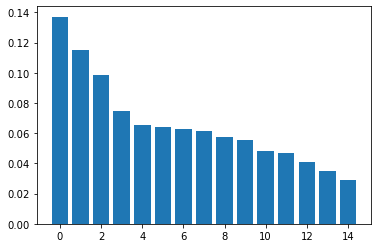

In [39]:
X_train_pca = X_train_standard.copy()
X_test_pca = X_test_standard.copy()

pca = PCA(0.99)
pca.fit(X_train_pca)
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
print("Explained Ratio:", pca.explained_variance_ratio_.sum())
print ("Number of components: " ,len(pca.components_))
explained_variance_ratio = pca.explained_variance_ratio_
bar_1 = plt.bar(x=[i for i in range(len(pca.components_))],height=explained_variance_ratio)

plt.show()

 Using pca led to lower results, therfore we decided to not work with PCA.

In [40]:
X_train.shape

(44939, 16)

In [41]:
X_test.shape

(15000, 16)

## Test proceesing

The last stage of the pre-processing is the Test Processing.

<br>We combined all the changes we made on the train set, which should also be made on the test, into one function that will apply them all together. 
<br>In particular, we removed all required variables, converted the categorical variables, converted missing values, standardized the data, and selected a subset of variables from the existing variables. 
<br>On the processed test set, we will perform the final prediction.

In [42]:
#Load the test data
test =  pd.read_csv("test.csv")
test.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
0,023928c14abe04196d45bb4578b8fa0eb02189898ce93b...,964814,2072576.0,2.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,14.0,22934.0,5.703556,Win32 Executable (generic),42.7,-1.414118,6.554459,er
1,6436083d4eed84436768d66829b961927eeb9de2e6657f...,116736,200704.0,136.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,7445.0,20.397260,Win32 Executable MS Visual C++ (generic),48.8,NaN,5.581053,cs
2,038e71f41fdc5edb3a7afc112fb0679a4a5d6d94512055...,3091456,118784.0,124.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,9.0,148608.0,11.072796,InstallShield setup,24.1,-1.713507,6.103680,vh
3,be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da0...,1249792,1257472.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,0.0,2.0,121156.0,18.679618,Win32 Executable (generic),33.1,9.215390,5.418556,vh
4,e78f83f0af4f1fbcf8fffd562b4734701483818078bf0e...,2117632,2142208.0,165.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,21562.0,7.528631,Win32 Executable Microsoft Visual Basic 6,84.4,2.224768,NaN,er


In [43]:
test.shape

(18000, 23)

In [44]:
nulls_df = compute_nulls(test)
nulls_df

,missing_count,missing_ratio
exports,2814,0.156
has_debug,1614,0.090
imports,1274,0.071
A,1173,0.065
paths,1150,0.064
B,1138,0.063
has_relocations,995,0.055
has_tls,886,0.049
MZ,886,0.049
printables,842,0.047


In [45]:
def test_proccesing(test):
    
    #split
    sha_column = test.iloc[:,0]  
    rest_of_test = test.iloc[:,1:]  
    #outliers
    rest_of_test['A'] = rest_of_test['A'].clip(lower=lower_bound, upper=upper_bound) 
    #categorical
    rest_of_test['file_type_trid'] = rest_of_test['file_type_trid'].replace(infrequent_categories, 'Other')
    rest_of_test = replace_below_threshold(rest_of_test)
    rest_of_test = fill_and_freq_encode_test(rest_of_test)
    #nulls
    rest_of_test = mean_imputer.transform(rest_of_test)
    #feature selection
    rest_of_test = feat_drop(rest_of_test) 
    #standardization
    rest_of_test_scaled = pd.DataFrame(scaler.transform(rest_of_test), index=rest_of_test.index, columns=rest_of_test.columns)
    #combine the split
    test = pd.concat([sha_column, rest_of_test_scaled], axis=1)
    
    return test

test = test_proccesing(test)



In [46]:
test.head()


,sha256,size,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,paths,urls,printables,file_type_trid,file_type_prob_trid,B,C
0,023928c14abe04196d45bb4578b8fa0eb02189898ce93b...,-0.114744,-0.500621,-1.391899e-17,-0.846257,-1.119651,0.000000,-0.591763,-0.566339,-0.032083,-0.046360,-1.639764e-01,-0.174525,0.846982,-0.533979,1.199263,-0.232476
1,6436083d4eed84436768d66829b961927eeb9de2e6657f...,-0.301438,0.144099,-5.948515e-02,1.242530,0.945414,0.410787,-0.591763,-0.566339,-0.032083,-0.018495,-1.639764e-01,-0.202489,0.846982,-0.238656,-0.369119,-0.918246
2,038e71f41fdc5edb3a7afc112fb0679a4a5d6d94512055...,0.353409,0.086363,-5.752623e-02,-0.846257,0.945414,0.410787,-0.591763,-0.566339,-0.032083,0.288013,-1.639764e-01,0.052371,0.846982,-1.434474,0.472954,1.196077
3,be913ef29b4566e7817a5ab2c4a4289a455e9b562e1da0...,-0.052010,-0.510244,-5.948515e-02,1.242530,0.945414,0.410787,-0.591763,-0.566339,-0.032083,-0.046360,-2.340398e-17,0.002808,0.846982,-0.998751,-0.630940,1.196077
4,e78f83f0af4f1fbcf8fffd562b4734701483818078bf0e...,0.139034,0.283628,-5.948515e-02,-0.846257,-1.119651,0.410787,-0.591763,-0.566339,-0.032083,0.065098,-1.639764e-01,-0.177002,-1.244651,1.484871,0.000000,-0.232476


In [47]:
test.shape

(18000, 17)

In [48]:
nulls_df = compute_nulls(test)
nulls_df

,missing_count,missing_ratio
sha256,0,0.0
symbols,0,0.0
B,0,0.0
file_type_prob_trid,0,0.0
file_type_trid,0,0.0
printables,0,0.0
urls,0,0.0
paths,0,0.0
has_tls,0,0.0
size,0,0.0


***
<font size=8> <center>  Modelling </font>
***

The selected models:
 * KNN 
 * Logistic Regression
 * MLP
 * Random Forest
 
To select the ideal parameters and due to the time limit in the project, we used Randomized Grid Search while examining different options to maximize the model's results. <br>In all models we used: <br>n_iter=10: the number of iterations of the test, a balance between computational efficiency and convergence to the optimal solution. <br>cv=5: from the number of cross-validation folds, contributes to a robust model estimation with a reasonable computational cost. <br>random_state=42: guarantees reproducibility of results. <br>n_jobs=-1: number of CPU cores for parallel processing. Causes faster execution by using all available CPU cores.

<br>There are models that benefit from working with normalized data (KNN, LOR, MLP) and for them we performed standardization. <br>In contrast, the RFC model is able to achieve optimal results even without normalizing the data. <br>For each model we performed an in-depth evaluation that included printing ROC, Confusion Matrix and Classification Report in graphic form. 

## KNN

This model is based on distance between samples so we chose to standardize to avoid effects of different scales or ranges on the model results. <br>We tested different values ​​for the following parameters: n_neighbors, algorithm, weights. <br>The effect of these parameters on the bias-variance trade-off is mainly through the parameters n_neighbors and weights. <br>n_neighbors controls the complexity of the model (more neighbors lead to a simpler model), while the weights control how much the model gives weight to the distances between the points. <br>algorithm does not directly affect the performance of the model but may affect the efficiency of the calculation.

In [49]:
knn_parameters = {'n_neighbors': [num for num in range(10,50,10)], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'weights': [ 'uniform', 'distance' ],'leaf_size':[30],'p':[2],'metric':['minkowski'],'metric_params':[None],'n_jobs':[1]}

Rs_knn = RandomizedSearchCV(KNeighborsClassifier(), knn_parameters, n_iter=10, cv=5, verbose=0, random_state=42, n_jobs=-1)
Rs_knn.fit(X_train_standard, y_train)

knn_best_estimator = Rs_knn.best_estimator_
knn_best_params = Rs_knn.best_params_

print(f'Best Params: {knn_best_params} \n')

KeyboardInterrupt: 

## Logistic Regression
In this model we examined which regularization to use. <br>Finally, we worked with l2 penalty which adds a little to the bias but minimizes the variation significantly, this is in order to minimize overfitting and for this we performed standardization. <br>The parameters for which different values ​​were tested were: C, penalty.

In [ ]:
log_reg_parameters = {'C': [num for num in range(10,51,10)], 'penalty':[ 'l1', 'l2', 'elasticnet', 'none' ],'dual':[False],'tol':[0.0001],'fit_intercept':[True],'intercept_scaling':[1],
                 'class_weight':[None],'random_state':[None],'solver':['lbfgs'],'max_iter':[100],'multi_class':['auto'],'verbose':[0],'warm_start':[False],
                    'n_jobs':[1],'l1_ratio':[None]}

Rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_parameters, n_iter=10, cv=5, verbose=0, random_state=42, n_jobs=-1)
Rs_log_reg.fit(X_train_standard, y_train)

log_reg_best_estimator = Rs_log_reg.best_estimator_
log_reg_best_params = Rs_log_reg.best_params_

print(f'Best Params: {log_reg_best_params} \n')


Best Params: {'warm_start': False, 'verbose': 0, 'tol': 0.0001, 'solver': 'lbfgs', 'random_state': None, 'penalty': 'l2', 'n_jobs': 1, 'multi_class': 'auto', 'max_iter': 100, 'l1_ratio': None, 'intercept_scaling': 1, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 50} 



## MLP

In order to speed up the convergence and to reduce the chance of reaching a bad local minimum, we standardized the data. <br>We tested different values ​​for the following parameters: alpha, hidden_layer_size. <br>Both can have a significant impact on the model's complexity and ability to fit the data, thus affecting the trade-off between bias and variance.

In [ ]:
MLP_parameters = { 'hidden_layer_sizes':[(40,), (60,)],'alpha':[0.0001, 0.001, 0.01, 0.1, 1],'batch_size':['auto'],'learning_rate':['constant'],'learning_rate_init':[0.001]\
     ,'power_t':[0.5], 'max_iter': [200], 'shuffle':[True], 'random_state':[None], 'tol':[0.0001], 'verbose':[False], 'warm_start':[False]\
         ,'momentum':[0.9], 'nesterovs_momentum':[True],'early_stopping':[False], 'validation_fraction':[0.1], 'beta_1':[0.9],'beta_2':[0.999],\
                  'solver':[ 'adam'], 'activation': ['relu'],'epsilon':[ 1e-8], 'n_iter_no_change':[10], 'max_fun':[15000]} 

Rs_MLP = RandomizedSearchCV(MLPClassifier(), MLP_parameters, n_iter=10, cv=5, verbose=0, random_state=42, n_jobs=-1)
Rs_MLP.fit(X_train_standard, y_train)

MLP_best_estimator = Rs_MLP.best_estimator_
MLP_best_params = Rs_MLP.best_params_

print(f'Best Params: {MLP_best_params} \n')


Best Params: {'warm_start': False, 'verbose': False, 'validation_fraction': 0.1, 'tol': 0.0001, 'solver': 'adam', 'shuffle': True, 'random_state': None, 'power_t': 0.5, 'nesterovs_momentum': True, 'n_iter_no_change': 10, 'momentum': 0.9, 'max_iter': 200, 'max_fun': 15000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (60,), 'epsilon': 1e-08, 'early_stopping': False, 'beta_2': 0.999, 'beta_1': 0.9, 'batch_size': 'auto', 'alpha': 0.001, 'activation': 'relu'} 



## Random Forest

This model is the only one that we have not standardized the data before implmenting, since it is not affected by scale. <br>The model produced excellent performance on the validation set and in addition also on all the Classification Report tests. <br>That's why we chose to continue with this model. <br>The parameters for which different values ​​were tested were: n_estimators, max_depth, min_samples_split. 

In [ ]:
rf_parameters ={'n_estimators':[100,300,600,1000], 'criterion':['entropy'],\
                'max_depth': [6,7,None], 'min_samples_split':[2,4,5],\
                'min_samples_leaf': [1], 'min_weight_fraction_leaf':[0.0],\
                'max_features': ['log2'], 'max_leaf_nodes':[None],\
                'min_impurity_decrease' :[0.0],"min_impurity_split":[None], 'bootstrap':[True], 'oob_score':[False], 'n_jobs':[1],\
                'random_state': [0], 'verbose':[0], 'warm_start':[False], 'class_weight':[None],\
                'ccp_alpha':[0.0], "max_samples":[None]}

Rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_parameters, n_iter=10, cv=5, verbose=0, random_state=42, n_jobs=-1)
Rs_rf.fit(X_train, y_train)

rf_best_estimator = Rs_rf.best_estimator_
rf_best_params = Rs_rf.best_params_

print(f'Best Params: {rf_best_params} \n')

Best Params: {'warm_start': False, 'verbose': 0, 'random_state': 0, 'oob_score': False, 'n_jobs': 1, 'n_estimators': 600, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': True} 



The selected parameters are:<br> n_estimators=600, max_depth=None, min_samples_split=2,<br> in addition to the other parameters that were left at their default value.

Seperating the models that require standartiziation on the data, and those who dont:

In [ ]:
standard_model_dict = {
    
    'KNN_Model' :KNeighborsClassifier().set_params(**knn_best_params),
    'LOR_Model' :LogisticRegression().set_params(**log_reg_best_params),
    'MLP': MLPClassifier().set_params(**MLP_best_params)
}

In [ ]:
RF_MODEL = {

    'RFC_Model' : RandomForestClassifier().set_params(**rf_best_params),
 }

And now, we are heading to the most interesting part! <br>
We will run the models with their best paramaters found and show for each of them:
* Train and validation AUC
* ROC 
* Confusion matrix
* Classification report

In [ ]:
def model_pred(name, model, X_train, X_test, y_train, y_test):
    alg = model
    alg_model = alg.fit(X_train, y_train)
    
    # Calculate and print the AUC for the training set
    y_train_prob = alg.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_prob)
    print(f'Training AUC for {name}: {train_auc}')

    # Calculate and print the AUC for the validation set
    y_test_prob = alg.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_test_prob)
    print(f'Validation AUC for {name}: {test_auc}')
    
    y_pred = alg_model.predict(X_test)
   
    # Convert the classification report into a DataFrame
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Create a 1x3 subplot for the classification report, the confusion matrix and the ROC curve
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Generate the confusion matrix for the test data and display it
    cm_test = confusion_matrix(y_test, y_pred)
    display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=alg_model.classes_)
    display_test.plot(cmap='Purples', ax=axs[0])
    axs[0].set_title(f'{name} - Confusion Matrix')

    # Plot the ROC curve in the second subplot
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    axs[1].plot(fpr, tpr, color='red', label='AUC = %0.5f' % roc_auc)
    axs[1].plot([0, 1], [0, 1], linestyle='--')
    axs[1].legend(loc='lower right')
    axs[1].set_title('ROC for ' + name)
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_xlabel('False Positive Rate')

     # Plot the heatmap using seaborn for the classification report
    sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='Greens', ax=axs[2])
    axs[2].set_title(f'{name} - Classification Report')

    plt.tight_layout()
    plt.show()

    return y_test_prob, y_pred


Training AUC for KNN_Model: 0.9999999940579753
Validation AUC for KNN_Model: 0.9297038243546012


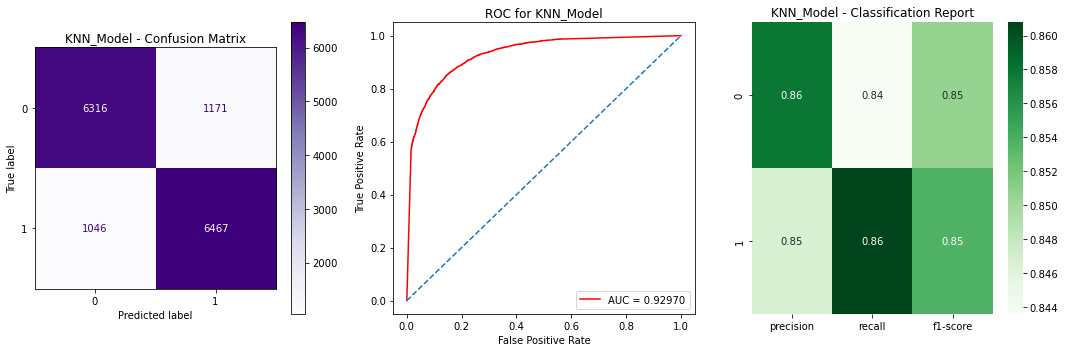

Training AUC for LOR_Model: 0.7950784801213846
Validation AUC for LOR_Model: 0.7950422642158694


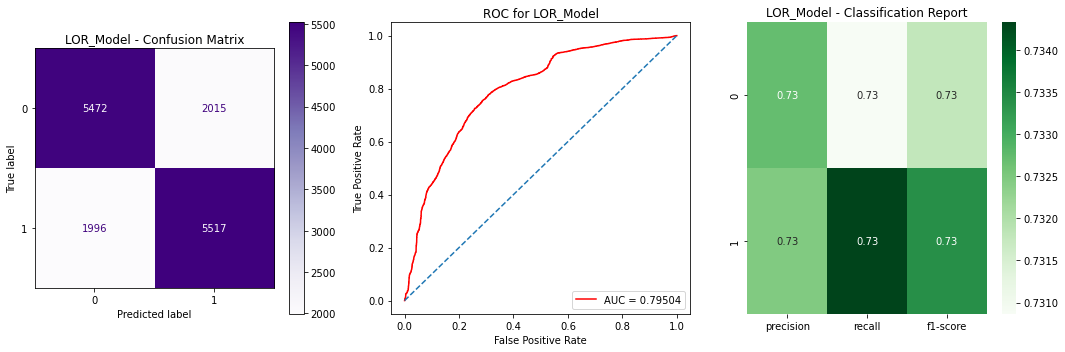

Training AUC for MLP: 0.9397453989834195
Validation AUC for MLP: 0.9291312359676246


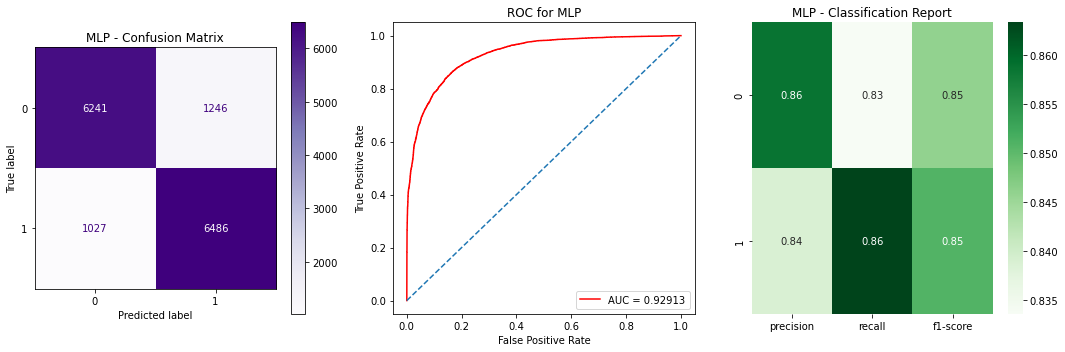

Training AUC for RFC_Model: 0.9999948700521217
Validation AUC for RFC_Model: 0.9767645790793575


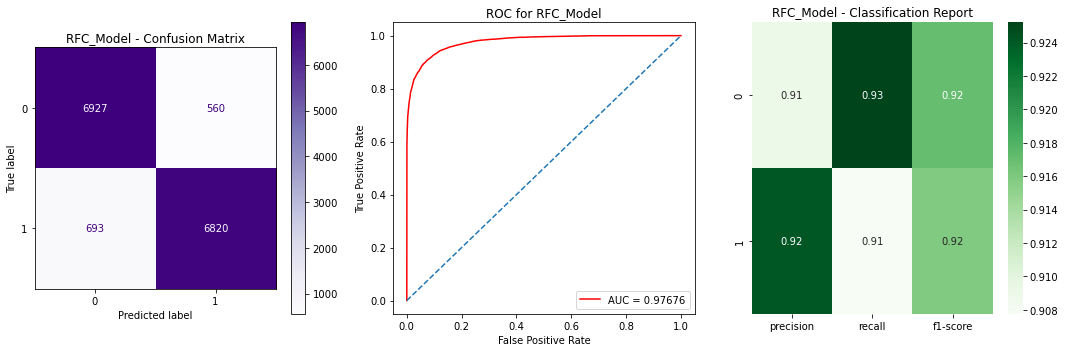

In [ ]:
#Runing all models
def run_models(model_dict):
    for name, model in model_dict.items():
        if name in standard_model_dict:
            y_prob , y_pred = model_pred(name,model, X_train_standard, X_test_standard, y_train, y_test )
        else:
            y_prob , y_pred = model_pred(name,model, X_train, X_test, y_train, y_test )

       
run_models(standard_model_dict)
run_models(RF_MODEL)

Our star model is `Random Forest classifier`, that provided 0.976 validation auc and in addition, excellent results on precision, recall and F1-score

## Overfitting suspect

After it was accepted that the train AUC=0.999, we had a suspicion of overfitting. <br>RFC is known as a model that learns the training set almost perfectly, especially if the trees are allowed to grow deep (large n_estimators). <br>But this does not necessarily mean that there is overfitting in a way that will impair the capabilities of the model on new data. <br>In addition, the interval between the validation\train AUC is normal and this indicates that despite possible overfitting, good performance will still be obtained on new data.

## Feature importance

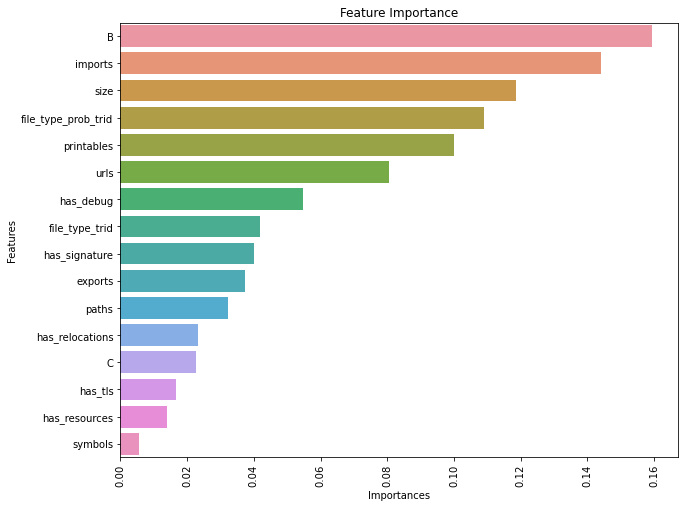

In [ ]:
best_model = RandomForestClassifier(**rf_best_params)
best_model.fit(X_train, y_train)
importances = best_model.feature_importances_

# Create a DataFrame for visualization
df_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': importances
})

# Sort the DataFrame by importances in descending order
df_importances = df_importances.sort_values(by='Importances', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importances', y='Features', data=df_importances)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

* `B` is an anonymous feature therefore we cannot justify/doubt its being in the 1st place.

* The second most important feature is `imports`, which is the number of imported functions.
Greater number of imports can imply higher chances that malicious actions were conducted. 
We assume that a large number of imports can suggest a file's malicious nature as malware frequently utilizes unusual libraries and functions, often in larger numbers or obfuscated forms, which aren't typically seen in benign software.

* `Size` is the third most important feature. The feature can indicate malicious files as they often contain more code, additional obfuscation, extra payloads, or redundant elements to evade detection, which all tend to increase the file size.


In [ ]:
models = {
    'KNN_Model' :KNeighborsClassifier().set_params(**knn_best_params),
    'LOR_Model' :LogisticRegression().set_params(**log_reg_best_params),
    'MLP': MLPClassifier().set_params(**MLP_best_params),
    'RFC_Model' : RandomForestClassifier().set_params(**rf_best_params),

    }

In [ ]:
# combine the train and test for future work

X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train,y_test])

X_combined_standard = pd.concat([X_train_standard, X_test_standard])


In [ ]:
# This function takes in input parameters X and y, which are data arrays,
# models, which is a dictionary containing different types of machine learning models,
# and k, which indicates the number of splits to be made for k-fold cross validation.

def KfoldPlot(X, y, models, k):
    colors_to_use = ['red','yellow', 'purple', 'orange']
    plt.figure(figsize=(12,12))
    kf = KFold(n_splits=k, shuffle=False)

    # Iterating through each model and its corresponding name in the models dictionary.
    for color, (name, model) in enumerate(models.items()):
        # Initializing mean_tpr to 0.0 and mean_fpr to an array of equally spaced values between 0 and 1.
        mean_tpr = 0.0
        mean_fpr = np.linspace(0, 1, 100)
        
        # Splitting the data into training and validation sets.
        for i, (train_index, validation_index) in enumerate(kf.split(X)):
            X_train, X_validation = X[train_index], X[validation_index]
            y_train, y_validation = y[train_index], y[validation_index]
            
            if isinstance(model, RandomForestClassifier):
                # No scaling required for RandomForestClassifier
                X_train_scaled, X_validation_scaled = X_train, X_validation
            else:
                # Standard scaling for other models
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_validation_scaled = scaler.transform(X_validation)
            
            model.fit(X_train_scaled, y_train)
            prob_prediction = model.predict_proba(X_validation_scaled)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
            # Adding the interpolated true positive rate to mean_tpr.
            mean_tpr += np.interp(mean_fpr, fpr, tpr)
            
            # Printing the validation AUC score for each fold.
            auc_score = auc(fpr, tpr)
            print(f"Model: {name}, Validation: {i+1}, AUC Score: {auc_score}")
            
            # Plotting the ROC curve for each fold using a gray color with transparency.
            plt.plot(fpr, tpr, color='#D3D3D3', alpha=0.3)

        print ('\n')

        # Dividing mean_tpr by k to get the average true positive rate across all folds.
        mean_tpr /= k
        # Setting the last value of mean_tpr to 1.0 to ensure that the ROC curve ends at (1,1).
        mean_tpr[-1] = 1.0
        # Computing the area under the curve for the mean ROC curve.
        mean_auc = auc(mean_fpr, mean_tpr)
        # Plotting the mean ROC curve for the current model using its designated color.
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.plot(mean_fpr, mean_tpr, color=colors_to_use[color], linestyle='-',
                 label=name + ' Mean ROC (area = %0.5f)' % mean_auc)
        
    # Setting the x and y limits for the plot.
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('TP Rate')
    plt.xlabel('FP Rate')
    plt.title('ROC for all models')
    plt.legend(loc="lower right")
    plt.show()




Model: KNN_Model, Validation: 1, AUC Score: 0.9323573528437579
Model: KNN_Model, Validation: 2, AUC Score: 0.9356236163306523
Model: KNN_Model, Validation: 3, AUC Score: 0.9314345746991173
Model: KNN_Model, Validation: 4, AUC Score: 0.9336214094755279
Model: KNN_Model, Validation: 5, AUC Score: 0.9289231824164977


Model: LOR_Model, Validation: 1, AUC Score: 0.7920731106512957
Model: LOR_Model, Validation: 2, AUC Score: 0.7977873258810254
Model: LOR_Model, Validation: 3, AUC Score: 0.7955295356397867
Model: LOR_Model, Validation: 4, AUC Score: 0.7999236625222147
Model: LOR_Model, Validation: 5, AUC Score: 0.7908045913655894


Model: MLP, Validation: 1, AUC Score: 0.9342381287182562
Model: MLP, Validation: 2, AUC Score: 0.9308994762305297
Model: MLP, Validation: 3, AUC Score: 0.9307427194390119
Model: MLP, Validation: 4, AUC Score: 0.9317345438665916
Model: MLP, Validation: 5, AUC Score: 0.9282054614053613


Model: RFC_Model, Validation: 1, AUC Score: 0.9780783974152362
Model: RFC_Model

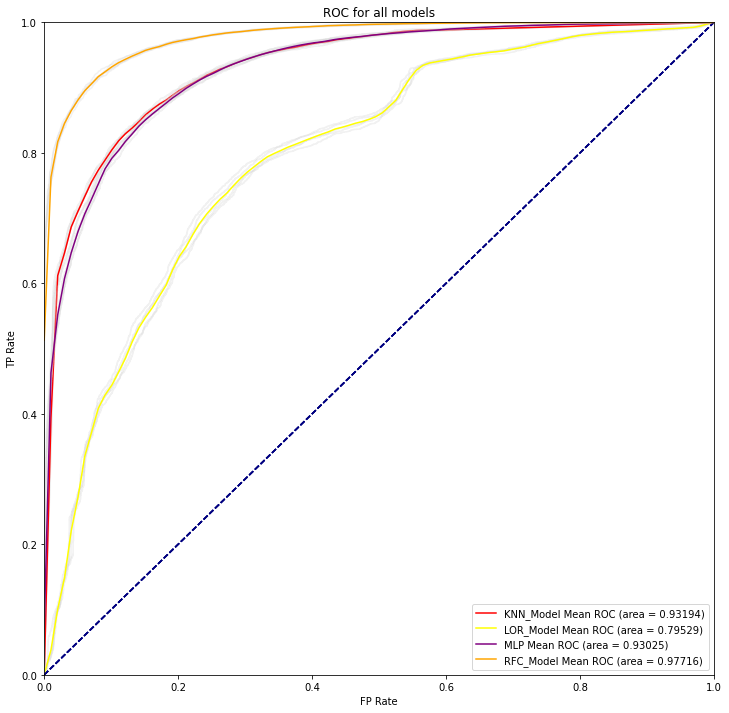

In [ ]:
KfoldPlot(np.array(X_combined), np.array(y_combined) ,models, 5)

Finally, we tested the quality of the models by using K Fold Cross Validation. <br>It can be seen that the best results were indeed obtained by the Random Forest model where AUC = 0.976. <br>Another thing that can be seen is that for each of the models there is consistency in the curves representing the fold scores and there are not many intervals between the lines. <br>This shows that the performance of the model does not depend excessively on a certain arrangement or selection of the data (FP,TP rates are stable and do not depend on the distribution of the data).

<font size=8> <center> Prediction </font>

## final pipline processing:

In [ ]:
train = pd.read_csv('train.csv')
test =  pd.read_csv("test.csv")

In [ ]:
test = test_proccesing(test)

In [ ]:
sha256_column = test['sha256']

# dropped the 'sha256' column from the test DataFrame
# so it doesn't interfere with our predictions
test_data = test.drop(columns=['sha256'])

In [ ]:
chosen_model_parameters ={'n_estimators':[100,300,600,1000], 'criterion':['entropy'],\
                'max_depth': [6,7,None], 'min_samples_split':[2,4,5],\
                'min_samples_leaf': [1], 'min_weight_fraction_leaf':[0.0],\
                'max_features': ['log2'], 'max_leaf_nodes':[None],\
                'min_impurity_decrease' :[0.0],"min_impurity_split":[None], 'bootstrap':[True], 'oob_score':[False], 'n_jobs':[1],\
                'random_state': [0], 'verbose':[0], 'warm_start':[False], 'class_weight':[None],\
                'ccp_alpha':[0.0], "max_samples":[None]}

# We use 10 iterations here and 5-fold cross-validation
chosen_model = RandomizedSearchCV(RandomForestClassifier(), chosen_model_parameters, n_iter=10, cv=5, verbose=0, random_state=42, n_jobs=-1)
chosen_model.fit(X_combined, y_combined)

# finding the best set of parameter values to train the model on.
rf_best_estimator = chosen_model.best_estimator_
rf_best_params = chosen_model.best_params_

In [ ]:

test_probabilities = chosen_model.predict_proba(test_data)

# positive class probability
positive_class_probabilities = test_probabilities[:, 1]

results = pd.DataFrame({
    'sha256': sha256_column,
    'predict_proba': positive_class_probabilities
})

results.to_csv('results_5.csv', index=False)
